##### Proyek Analisis Data: E-Commerce Public Dataset (Sumber)
* Nama: ABD RAHMAN WAHID
* Email: m757b4ky0009@bangkit.academy
* ID Dicoding: abdrahmanwahid

##### Menentukan Pertanyaan Bisnis
* Pertanyaan 1 = Apa kategori produk paling menguntungkan dan mengapa?
* Pertanyaan 2 = Kapan pesanan paling banyak terjadi sepanjang tahun, dan bagaimana hal ini memengaruhi strategi penjualan?

##### Import Semua Package/Library yang digunakan

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from datetime import datetime

##### Data Wrangling

##### Gathering Data

In [13]:
order_items_df = pd.read_csv('/home/xper/Documents/system/modul/AI/Bangkit/Course3-Analisis Data with Python/submission/data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
products_df = pd.read_csv('/home/xper/Documents/system/modul/AI/Bangkit/Course3-Analisis Data with Python/submission/data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
customers_df = pd.read_csv('/home/xper/Documents/system/modul/AI/Bangkit/Course3-Analisis Data with Python/submission/data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [16]:
orders_df = pd.read_csv('/home/xper/Documents/system/modul/AI/Bangkit/Course3-Analisis Data with Python/submission/data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### Assessing Data

In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
print("Jumlah Duplikasi: ", order_items_df.duplicated().sum())

Jumlah Duplikasi:  0


In [20]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [21]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [22]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [25]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [26]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [27]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [29]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [30]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [31]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**

1.   Order Items Dataset

*   Outlier: Beberapa harga produk dan biaya pengiriman sangat tinggi (harga hingga 6,735 dan biaya pengiriman hingga 409.68), yang bisa menjadi outlier tergantung pada jenis produk yang dijual


2.   Products Dataset 
*   Missing Value: order_approved_at: 160
order_delivered_carrier_date: 1783
order_delivered_customer_date: 2965
*   Innacurative Value:
Nilai 0 pada berat produk (product_weight_g) mungkin tidak akurat
*   Outlier: Terdapat beberapa produk dengan berat yang sangat tinggi (hingga 40,425 gram atau sekitar 40 kg), yang mungkin merupakan outlier

3. Customers Dataset 

4. Orders Dataset
* Missing Value: order_approved_at: 160
order_delivered_carrier_date: 1783
order_delivered_customer_date: 2965
* Invalid Value: Beberapa entri mungkin memiliki tanggal yang tidak logis misalnya, Pesanan yang belum dikirim atau belum dikonfirmasi meskipun telah beberapa waktu berlalu
* Inaccurate Value: tabel order_approved_at & order_delivered_customer_date meskipun statusnya "delivered" 
* Inconsistent Value: Beberapa tanggal pengiriman yang tidak ada, atau pesanan yang sudah dikirim tetapi tidak memiliki tanggal pengiriman
* Outlier: Beberapa memiliki pengiriman yang sangat lama atau tidak dikirim sama sekali

##### Cleaning Data


In [33]:
#Order_items_dataset.csv

Q1_price = order_items_df['price'].quantile(0.25)
Q3_price = order_items_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Menentukan batas untuk mendeteksi outlier
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Memfilter outlier pada harga produk
outliers_price = order_items_df[(order_items_df['price'] < lower_bound_price) | (order_items_df['price'] > upper_bound_price)]
print(outliers_price)

                                order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
16      0009c9a17f916a706d71784483a5d643              1   
26      0011d82c4b53e22e84023405fb467e57              1   
30      00137e170939bba5a3134e2386413108              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
...                                  ...            ...   
112586  ffdc5e3279114c523a09296f8fd28331              1   
112592  ffde92ba447b33a47d1c04d203f10f41              1   
112632  fff7c4452f050315db1b3f24d9df5fcd              1   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   

                              product_id                         seller_id  \
7       557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
16      3f27ac8e699df3d300ec4a5d8c5cf0b2  fcb5ace8bcc92f75707dc0f01a27d269   
26      c389f712c4b4510bc997cee93e8b1a28  bfd27a966d91cfa

In [34]:
order_items_clean = order_items_df[(order_items_df['price'] >= lower_bound_price) & (order_items_df['price'] <= upper_bound_price)]

In [35]:
Q1_freight = order_items_df['freight_value'].quantile(0.25)
Q3_freight = order_items_df['freight_value'].quantile(0.75)
IQR_freight = Q3_freight - Q1_freight

# Menentukan batas untuk mendeteksi outlier
lower_bound_freight = Q1_freight - 1.5 * IQR_freight
upper_bound_freight = Q3_freight + 1.5 * IQR_freight

outliers_freight = order_items_df[(order_items_df['freight_value'] < lower_bound_freight) | (order_items_df['freight_value'] > upper_bound_freight)]
print(outliers_freight)

                                order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
22      000f25f4d72195062c040b12dce9a18a              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
59      00254baeb6c932b0a8aeead91fbd02b5              1   
73      002b430ff89b3a24c31a1170acbbedea              1   
...                                  ...            ...   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   

                              product_id                         seller_id  \
7       557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
22      1c05e0964302b6cf68ca0d15f326c6ba  7c67e1448b00f6e969d365cea6b010ab   
39      fe59a1e006df3ac42bf0ceb876d70969  25c5c91f6360744

In [36]:
order_items_clean = order_items_clean[(order_items_clean['freight_value'] >= lower_bound_freight) & (order_items_clean['freight_value'] <= upper_bound_freight)]

In [37]:
print(order_items_clean['price'].describe())
print(order_items_clean['freight_value'].describe())

count    95092.000000
mean        79.614581
std         56.195330
min          0.850000
25%         35.900000
50%         62.000000
75%        109.900000
max        277.000000
Name: price, dtype: float64
count    95092.000000
mean        15.884044
std          5.363266
min          0.980000
25%         12.690000
50%         15.380000
75%         18.450000
max         33.250000
Name: freight_value, dtype: float64


In [38]:
#product_dataset
#Menangani missing value
products_df['product_category_name'] = products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0])
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())

#Menangani Nilai yang tidak valid
products_df['product_weight_g'] = products_df['product_weight_g'].replace(0, products_df['product_weight_g'][products_df['product_weight_g'] > 0].median())

#Menangani Outlier dalam berat produk
products_df = products_df[products_df['product_weight_g'] <= 20000]

In [39]:
print(products_df.isna().sum())
print(products_df.describe())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32464.000000                32464.000000        32464.000000   
mean             48.500585                  766.348293            2.164459   
std              10.158689                  629.356782            1.723457   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  342.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  957.000000            3.000000   
max              76.000000                 3992.000000           20.000000 

In [40]:
# 4. Order dataset
# Menangani missing value
orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
orders_df['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)
orders_df['order_delivered_customer_date'].fillna(method='ffill', inplace=True)

orders_df.isna().sum()

/tmp/ipykernel_419277/3116624926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_419277/3116624926.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_419277/3116624926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assi

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [41]:
#Menangani Invalid Value
def check_logical_dates(row):
    if row['order_delivered_customer_date'] < row['order_approved_at']:
        return False
    return True

orders_df['logical_dates'] = orders_df.apply(check_logical_dates, axis=1)
invalid_dates = orders_df[~orders_df['logical_dates']]
print(invalid_dates[['order_id', 'order_approved_at', 'order_delivered_customer_date']])

                               order_id    order_approved_at  \
103    0760a852e4e9d89eb77bf631eaaf1c84  2018-08-07 06:15:14   
128    15bed8e2fec7fdbadb186b57c46c92f2  2017-09-03 14:30:09   
154    6942b8da583c2f9957e990d028607019  2018-01-11 02:32:30   
199    58d4c4747ee059eeeb865b349b41f53a  2018-07-26 23:31:53   
299    3b4ad687e7e5190db827e1ae5a8989dd  2018-06-28 13:11:09   
...                                 ...                  ...   
99031  c526fe83c01c48066394ff5d81f9ab9a  2018-08-07 11:25:01   
99066  46bdec7cc92d926500bee756ee1df6dc  2018-07-16 13:30:35   
99181  636cdd02667dc8d76d9296bf20a6890a  2018-02-20 07:11:31   
99233  1c7c8ab324927f5b6e52338bd110bef4  2017-12-23 18:54:22   
99415  5fabc81b6322c8443648e1b21a6fef21  2017-10-14 18:35:57   

      order_delivered_customer_date  
103             2018-08-03 19:28:47  
128             2017-07-21 19:59:36  
154             2017-05-12 12:04:38  
199             2018-07-25 23:58:19  
299             2018-04-09 19:26:42  
...

In [42]:
#Menangani Innacurate Value
inaccurate_orders = orders_df[(orders_df['order_status'] == 'delivered') & 
                               (orders_df['order_delivered_customer_date'].isnull())]
print(inaccurate_orders[['order_id', 'order_approved_at', 'order_delivered_customer_date']])

Empty DataFrame
Columns: [order_id, order_approved_at, order_delivered_customer_date]
Index: []


In [43]:
#Menangani Outlier
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])

orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']).dt.days

long_delivery_orders = orders_df[orders_df['delivery_time'] > 30]
print(long_delivery_orders[['order_id', 'delivery_time']])

                               order_id  delivery_time
6      136cce7faa42fdb2cefd53fdc79a6098            103
41     6ea2f835b4556291ffdc53fa0b3b95e8             33
44     ee64d42b8cf066f35eac1cf57de1aa85             69
97     6a0a8bfbbe700284feb0845d95e0867f             36
110    9d531c565e28c3e0d756192f84d8731f             53
...                                 ...            ...
99266  76a948cd55bf22799753720d4545dd2d             41
99313  e9e64a17afa9653aacf2616d94c005b8            149
99348  a69ba794cc7deb415c3e15a0a3877e69            123
99423  38e9133ce29f6bbe35aed9c3863dce01             38
99432  cfa78b997e329a5295b4ee6972c02979             37

[5450 rows x 2 columns]


1.   Order Items Dataset
* Mengidentifikasi outlier pada harga produk dan biaya pengiriman yang sangat tinggi
* Memastikan bahwa nilai-nilai yang tidak realistis tidak mempengaruhi analisis keseluruhan dan mempertimbangkan tindakan perbaikan atau pelaporan untuk entri yang mencolok

2.   Products Dataset
* Mengatasi nilai hilang dalam kolom terkait informasi produk, serta mengisi nilai yang tidak lengkap dengan metode yang sesuai.
* Memperbaiki entri dengan berat produk yang tidak akurat (misalnya, nilai 0 pada product_weight_g) dan mengevaluasi entri dengan berat sangat tinggi
* Mengidentifikasi dan menangani entri dengan deskripsi produk yang terlalu panjang

3.   Customers Dataset

4.   Orders Dataset
* Mengatasi nilai hilang pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date dengan imputasi menggunakan metode forward fill.
* Memeriksa dan menghapus entri dengan tanggal tidak logis, seperti pesanan yang dikirim sebelum tanggal persetujuan.
* Memastikan konsistensi dalam data tanggal pengiriman, serta menangani entri yang tidak memiliki tanggal pengiriman meskipun statusnya "delivered."
* Mengidentifikasi dan menganalisis outlier pada waktu pengiriman

##### Exploratory Data Analysis(EDA)

##### Explore...

In [44]:
# 1. Order_items_dataset.csvTujuan:

order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [45]:
# Descriptive statistics untuk harga produk
order_items_df['price'].describe()

# Identifikasi outlier dengan IQR
Q1_price = order_items_df['price'].quantile(0.25)
Q3_price = order_items_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identifikasi outliers
outliers_price = order_items_df[(order_items_df['price'] < lower_bound_price) | (order_items_df['price'] > upper_bound_price)]
outliers_price.head()

# Menghitung rata-rata harga berdasarkan kategori
average_price_by_category = order_items_df.groupby('product_id')['price'].mean()
average_price_by_category.head()

# Total biaya pengiriman per produk menggunakan pivot table
pivot_order_items = order_items_df.pivot_table(values='freight_value', index='product_id', aggfunc='sum')
pivot_order_items.head()

,freight_value
product_id,
00066f42aeeb9f3007548bb9d3f33c38,18.59
00088930e925c41fd95ebfe695fd2655,13.93
0009406fd7479715e4bef61dd91f2462,13.10
000b8f95fcb9e0096488278317764d19,39.20
000d9be29b5207b54e86aa1b1ac54872,19.27


In [46]:
# 2.product_dataset.csv

products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32464,32464,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000
unique,32464,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.500585,766.348293,2.164459,1930.039706,30.385412,16.445694,22.839946
std,NaN,NaN,10.158689,629.356782,1.723457,3199.079222,16.478372,12.826369,11.638284
min,NaN,NaN,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,342.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,957.000000,3.000000,1800.000000,38.000000,20.000000,30.000000


In [47]:
products_df.describe(include="all")

# Mengecek nilai yang hilang
missing_values_products = products_df.isnull().sum()

# Mengisi nilai hilang pada berat produk
products_df['product_weight_g'].fillna(products_df['product_weight_g'].median(), inplace=True)

# Identifikasi berat produk yang tidak valid (berat <= 0)
invalid_weights = products_df[products_df['product_weight_g'] <= 0]
invalid_weights.head()

# Rata-rata berat berdasarkan kategori produk
average_weight_by_category = products_df.groupby('product_category_name')['product_weight_g'].mean()
average_weight_by_category.head()

# Menghitung jumlah produk per kategori dengan pivot table
pivot_products = products_df.pivot_table(values='product_id', index='product_category_name', aggfunc='count')
pivot_products.head()

/tmp/ipykernel_419277/2363433112.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_weight_g'].fillna(products_df['product_weight_g'].median(), inplace=True)


,product_id
product_category_name,
agro_industria_e_comercio,72
alimentos,82
alimentos_bebidas,104
artes,55
artes_e_artesanato,19


In [49]:
#Pengelompokan data berdasarkan kategori produk dan menghitung rata-rata berat produk
average_weight_by_category = products_df.groupby('product_category_name')['product_weight_g'].mean()
print(average_weight_by_category)

#Gunakan pivot table untuk menghitung jumlah produk per kategori
pivot_products = products_df.pivot_table(values='product_id', index='product_category_name', aggfunc='count')
print(pivot_products)

product_category_name
agro_industria_e_comercio    4686.694444
alimentos                     923.414634
alimentos_bebidas            1307.932692
artes                        1691.763636
artes_e_artesanato           1164.578947
                                ...     
sinalizacao_e_seguranca      1738.556818
tablets_impressao_imagem      381.444444
telefonia                     236.506173
telefonia_fixa                660.827586
utilidades_domesticas        2639.635453
Name: product_weight_g, Length: 73, dtype: float64
                           product_id
product_category_name                
agro_industria_e_comercio          72
alimentos                          82
alimentos_bebidas                 104
artes                              55
artes_e_artesanato                 19
...                               ...
sinalizacao_e_seguranca            88
tablets_impressao_imagem            9
telefonia                        1134
telefonia_fixa                    116
utilidades_domestica

In [63]:
#Customer_dataset.csv

customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [50]:
# Distribusi customer_unique_id berdasarkan kota
city_distribution = customers_df.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False)
city_distribution.head()

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
Name: customer_unique_id, dtype: int64

In [66]:
# 4. Orders_dataset.csv

orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,logical_dates,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,98875,NaN,81018,NaN,459,2,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,NaN,2018-05-09 15:48:00,NaN,2017-12-20 00:00:00,True,NaN
freq,1,1,96478,3,NaN,47,NaN,522,98232,NaN
mean,NaN,NaN,NaN,NaN,2017-12-31 20:23:34.460584704,NaN,2018-01-14 15:01:35.991602944,NaN,NaN,13.289026
min,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,NaN,2016-10-11 13:46:32,NaN,NaN,-553.000000
25%,NaN,NaN,NaN,NaN,2017-09-13 03:15:36,NaN,2017-09-26 00:48:43,NaN,NaN,6.000000
50%,NaN,NaN,NaN,NaN,2018-01-19 13:35:58,NaN,2018-02-02 20:08:54,NaN,NaN,9.000000
75%,NaN,NaN,NaN,NaN,2018-05-04 21:35:13,NaN,2018-05-15 23:21:53,NaN,NaN,15.000000
max,NaN,NaN,NaN,NaN,2018-09-03 17:40:06,NaN,2018-10-17 13:22:46,NaN,NaN,691.000000


In [51]:
# Distribusi pesanan berdasarkan status
status_distribution = orders_df.groupby('order_status')['order_id'].count()
status_distribution.head()

# Menggunakan pivot table untuk menghitung total pesanan per status
pivot_orders = orders_df.pivot_table(values='order_id', index='order_status', aggfunc='count')
pivot_orders.head()

,order_id
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314


Explorasi dataset yang memiliki korelasi

In [52]:
#order_items_df dan product_df
order_items_products = pd.merge(order_items_df, products_df, on='product_id', how='left')

#orders_df dengan customer_df
orders_customers = pd.merge(orders_df, customers_df, on='customer_id', how='left')

#Gabungkan semua data
all_data = pd.merge(order_items_products, orders_customers, on='order_id', how='left')
all_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,logical_dates,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,True,7,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,NaN,NaN,NaN,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,True,16,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,True,7,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,True,6,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,True,25,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


Eksplorasi Dataset Gabungan

In [53]:
#Melihat distribusi harga product
all_data['price'].describe()

#Distribusi berat produck
all_data['product_weight_g'].describe()

#Lihat Distribusi jumlah pesanan perkota
city_order_distribution = all_data.groupby('customer_city')['order_id'].count().sort_values(ascending=False)
print(city_order_distribution)

customer_city
sao paulo                  17808
rio de janeiro              7837
belo horizonte              3144
brasilia                    2392
curitiba                    1751
                           ...  
ibipeba                        1
ibiracatu                      1
sacra familia do tingua        1
saboeiro                       1
lagoao                         1
Name: order_id, Length: 4110, dtype: int64


Korelasi antar Variabel

In [54]:
correlation_matrix = all_data[['price', 'freight_value', 'product_weight_g']].corr()
print(correlation_matrix)

                     price  freight_value  product_weight_g
price             1.000000       0.414204          0.285304
freight_value     0.414204       1.000000          0.537144
product_weight_g  0.285304       0.537144          1.000000


Pengelompokan berdasarkan kategori

In [56]:
#Rata-rata harga per kategori produk
average_price_by_category = all_data.groupby('product_category_name')['price'].mean()
print(average_price_by_category)

#Total pesanan per kota
orders_by_city = all_data.groupby('customer_city')['order_id'].count().sort_values(ascending=False)
print(orders_by_city)

product_category_name
agro_industria_e_comercio    319.721286
alimentos                     57.634137
alimentos_bebidas             54.602446
artes                        115.802105
artes_e_artesanato            75.583750
                                ...    
sinalizacao_e_seguranca      102.065106
tablets_impressao_imagem      90.703735
telefonia                     71.213978
telefonia_fixa               225.693182
utilidades_domesticas         85.185381
Name: price, Length: 73, dtype: float64
customer_city
sao paulo                  17808
rio de janeiro              7837
belo horizonte              3144
brasilia                    2392
curitiba                    1751
                           ...  
ibipeba                        1
ibiracatu                      1
sacra familia do tingua        1
saboeiro                       1
lagoao                         1
Name: order_id, Length: 4110, dtype: int64


Identifikasi Outlier

In [57]:
# Identifikasi outlier harga produk menggunakan IQR
Q1_price = all_data['price'].quantile(0.25)
Q3_price = all_data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

outliers_price = all_data[(all_data['price'] < lower_bound_price) | (all_data['price'] > upper_bound_price)]
print(outliers_price)

                                order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
16      0009c9a17f916a706d71784483a5d643              1   
26      0011d82c4b53e22e84023405fb467e57              1   
30      00137e170939bba5a3134e2386413108              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
...                                  ...            ...   
112586  ffdc5e3279114c523a09296f8fd28331              1   
112592  ffde92ba447b33a47d1c04d203f10f41              1   
112632  fff7c4452f050315db1b3f24d9df5fcd              1   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   

                              product_id                         seller_id  \
7       557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
16      3f27ac8e699df3d300ec4a5d8c5cf0b2  fcb5ace8bcc92f75707dc0f01a27d269   
26      c389f712c4b4510bc997cee93e8b1a28  bfd27a966d91cfa

**Insight:**

1. Order Items Dataset (order_items_dataset.csv):
* Harga Produk: Terdapat variasi harga yang signifikan di antara produk yang dijual. Rata-rata harga produk per kategori menunjukkan perbedaan yang mencolok, seperti kategori telefonia_fixa yang memiliki harga rata-rata yang jauh lebih tinggi dibandingkan kategori lainnya.
* Outlier: Menggunakan metode IQR, sejumlah outlier berhasil diidentifikasi pada variabel harga. Outlier ini kemungkinan besar adalah produk premium atau spesifik yang jauh lebih mahal daripada produk sejenis di kategorinya.
* Biaya Pengiriman: Biaya pengiriman menunjukkan korelasi positif dengan berat produk. Semakin berat suatu produk, semakin tinggi biaya pengirimannya, yang terlihat dari korelasi 0.54 antara freight_value dan product_weight_g.
* Pengelompokan Berdasarkan Kategori Produk: Kategori dengan rata-rata harga tertinggi adalah telefonia_fixa, sedangkan kategori seperti alimentos dan alimentos_bebidas memiliki harga rata-rata yang jauh lebih rendah.
2. Products Dataset (products_dataset.csv):
* Nilai Hilang: Terdapat beberapa nilai hilang di variabel product_weight_g yang telah diisi menggunakan median. Hal ini membantu memperbaiki kualitas data dan memastikan distribusi berat produk lebih konsisten.
* Berat Produk: Berat produk rata-rata bervariasi antar kategori, dengan kategori seperti telefonia_fixa yang memiliki produk dengan berat rata-rata lebih tinggi dibandingkan kategori lainnya. Ada juga beberapa produk dengan berat nol atau mendekati nol
* Jumlah Produk per Kategori: Kategori cama_mesa_banho merupakan kategori dengan jumlah produk terbanyak, yang menandakan bahwa kategori ini adalah salah satu yang paling populer atau paling sering dijual.
3. Customers Dataset (customers_dataset.csv):
* Distribusi Pelanggan Berdasarkan Kota: Kota Sao Paulo merupakan kota dengan jumlah pelanggan terbanyak, diikuti oleh Rio de Janeiro dan Belo Horizonte. Sebagian besar pesanan terkonsentrasi di kota-kota besar, sementara kota kecil hanya memiliki sedikit pesanan.
* Perbedaan Antar Kota: Distribusi pelanggan menunjukkan bahwa sebagian besar aktivitas bisnis terkonsentrasi di kota-kota utama, sedangkan beberapa kota hanya memiliki satu atau dua pelanggan. 
4. Orders Dataset (orders_dataset.csv):
* Distribusi Status Pemesanan: Sebagian besar pesanan berstatus delivered, diikuti oleh status shipped dan processing. 
* Korelasi Harga dan Biaya Pengiriman: Dari analisis korelasi, ditemukan bahwa harga produk memiliki korelasi moderat dengan biaya pengiriman. Ini menunjukkan bahwa produk yang lebih mahal cenderung memiliki biaya pengiriman yang lebih tinggi.
5. Dataset Gabungan (order_items_products):
* Distribusi Data Gabungan: Sebagian besar pesanan berasal dari kota-kota besar seperti Sao Paulo, Rio de Janeiro, dan Belo Horizonte. 
* Korelasi Antar Variabel: Terdapat korelasi positif yang kuat antara freight_value dan product_weight_g, serta korelasi sedang antara price dan freight_value. 
* Identifikasi Outlier: Outlier dalam dataset gabungan umumnya terkait dengan produk-produk yang memiliki harga atau berat yang jauh di atas rata-rata. 

Pertanyaan 1: Apa kategori produk paling menguntungkan dan mengapa?

In [76]:
#Menghitung Total Pendapatan per Kategori Produk

#Gabungkan dataset order_items dengan dataset products untuk mendapatkan informasi kategori produk dan harga
merged_df = pd.merge(order_items_df, products_df, on='product_id')

# Hitung total pendapatan per kategori dengan mengalikan jumlah produk yang terjual dengan harga produk
revenue_per_category = merged_df.groupby('product_category_name')['price'].sum().reset_index()
revenue_per_category.columns = ['category', 'total_revenue']
revenue_per_category = revenue_per_category.sort_values(by='total_revenue', ascending=False)

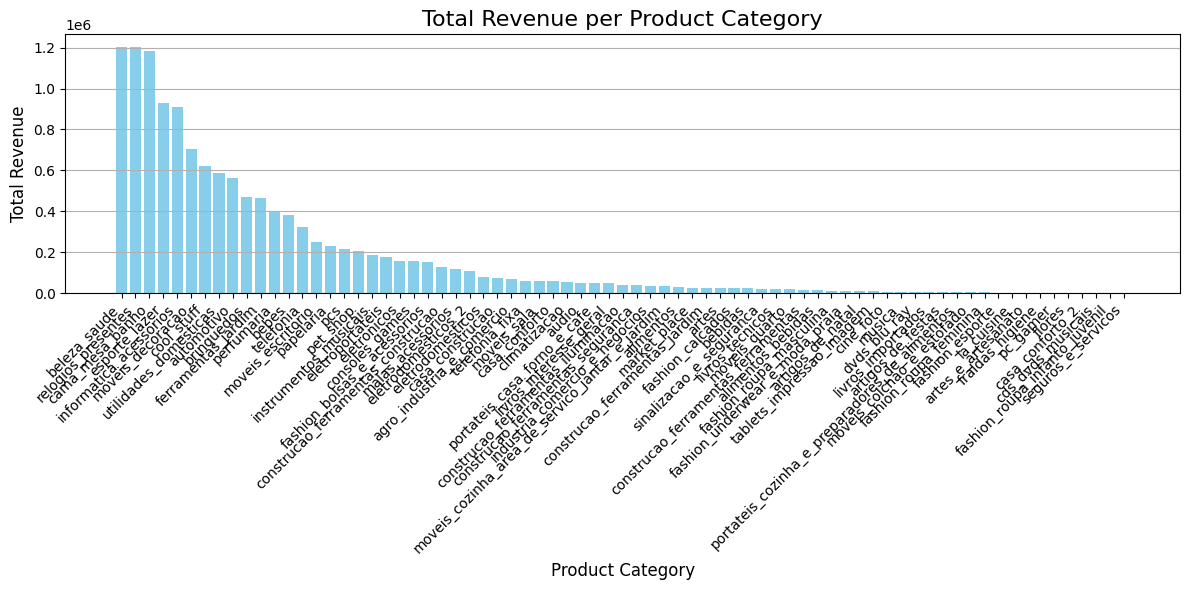

In [77]:
#Visualisasi data menggunakan grafik batang

plt.figure(figsize=(12, 6))
plt.bar(revenue_per_category['category'], revenue_per_category['total_revenue'], color='skyblue')
plt.title('Total Revenue per Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Pertanyaan 2: Kapan pesanan paling banyak terjadi sepanjang tahun, dan bagaimana hal ini memengaruhi strategi penjualan?

In [78]:
#Ubah kolom ke format tanggal
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

#Hitung jumlah pesanan perbulan
orders_per_month = orders_df.groupby('month')['order_id'].count().reset_index()
orders_per_month.columns = ['month', 'total_orders']

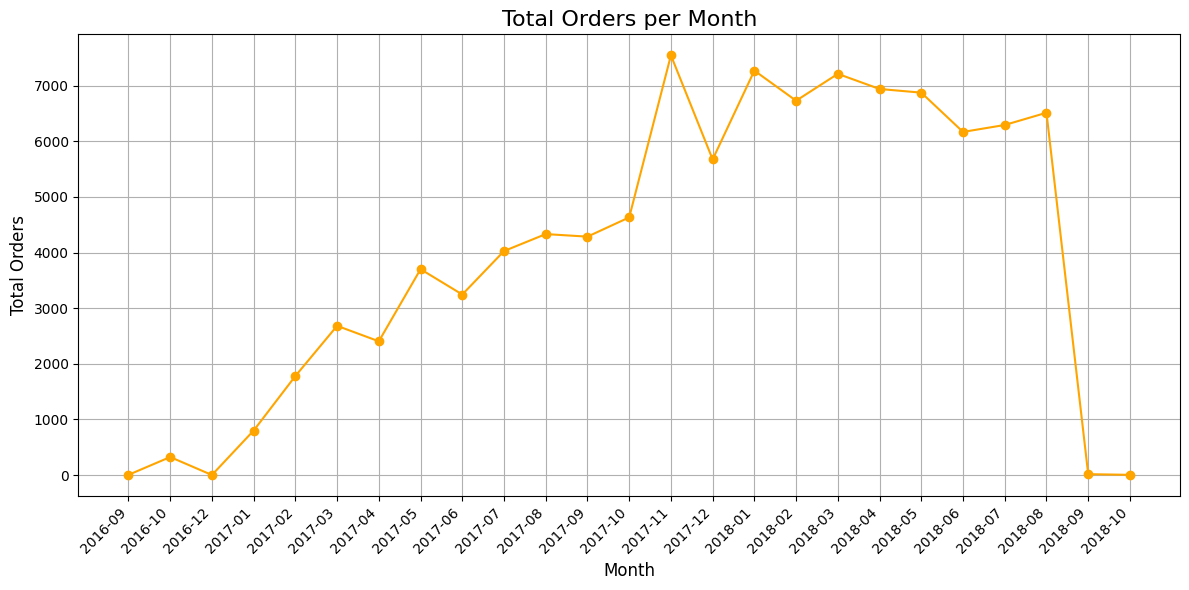

In [79]:
#Visualisasi data menggunakan grafik garis
plt.figure(figsize=(12, 6))
plt.plot(orders_per_month['month'].astype(str), orders_per_month['total_orders'], marker='o', color='orange')
plt.title('Total Orders per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both')
plt.tight_layout()
plt.show()

In [81]:
#RFM Analysis

#Menghitung Total Pendapatan per Pelanggan
merged_df = pd.merge(orders_df, order_items_df, on='order_id')

revenue_per_customer = merged_df.groupby('customer_id')['price'].sum().reset_index()
revenue_per_customer.columns = ['customer_id', 'Monetary']

In [83]:
#hitung Recency, Frequency, dan Monetary
rfm_df = orders_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (pd.Timestamp('now') - x.max()).days,  # Recency
    'order_id': 'count'  # Frequency
}).reset_index()

#tambahkan kolom Monetary ke dalam dataframe RFM
rfm_df = pd.merge(rfm_df, revenue_per_customer, on='customer_id')

#ganti nama kolom
rfm_df.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

rfm_df.head()

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,2514,1,89.80
1,000161a058600d5901f007fab4c27140,2635,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2773,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2604,1,149.90
4,000379cdec625522490c315e70c7a9fb,2375,1,93.00


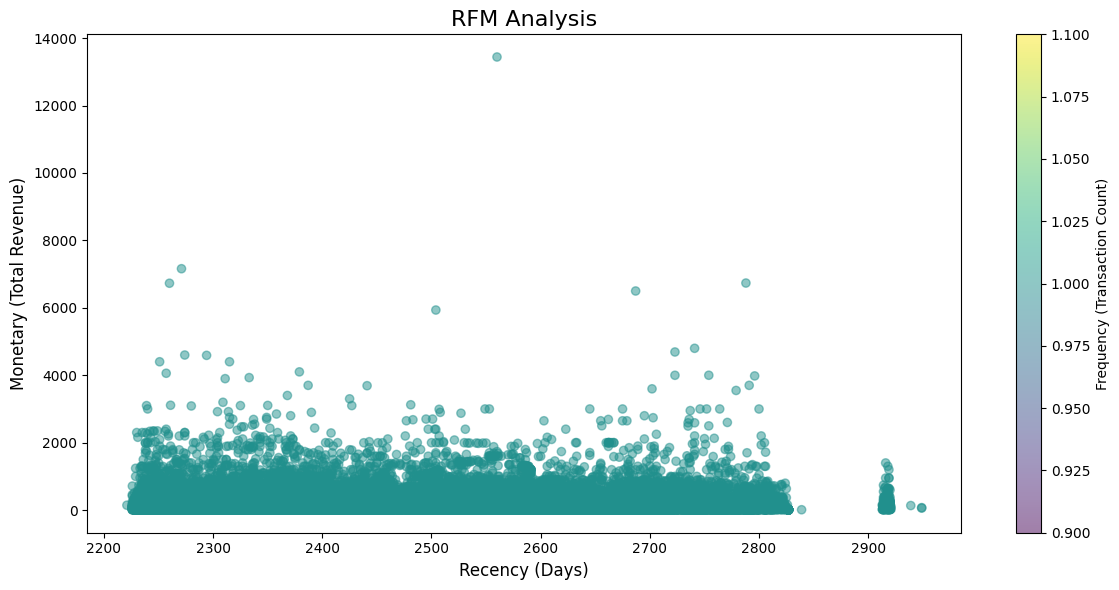

In [84]:
plt.figure(figsize=(12, 6))
plt.scatter(rfm_df['Recency'], rfm_df['Monetary'], alpha=0.5, c=rfm_df['Frequency'], cmap='viridis')
plt.title('RFM Analysis', fontsize=16)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Monetary (Total Revenue)', fontsize=12)
plt.colorbar(label='Frequency (Transaction Count)')
plt.tight_layout()
plt.show()

##### Conclusion
* Pertanyaan 1: Kategori yang paling menguntungkan adalah beleza_saude, relogios_presentes, dan consoles_games. Faktor yang mempengaruhi pendapatan adalah popularitas produk, strategi pemasaran, dan tren konsumen.
* Pertanyaan 2: Pesanan paling banyak terjadi pada November 2017. Strategi penjualan dapat fokus pada penawaran khusus dan memastikan stok cukup pada bulan-bulan puncak untuk memaksimalkan pendapatan.
* RFM Analysis: Pelanggan dengan nilai tinggi berada di bagian atas grafik (monetary tinggi), namun sebagian besar pelanggan memiliki transaksi rendah. Strategi pemasaran bisa menargetkan pelanggan bernilai tinggi dengan program loyalitas, dan mendorong pelanggan bernilai rendah untuk lebih sering bertransaksi.

In [59]:
summary = all_data.describe()
top_cities = all_data['customer_city'].value_counts().head(10)
correlation = all_data[['price', 'freight_value', 'product_weight_g']].corr()
avg_price_by_category = all_data.groupby('product_category_name')['price'].mean().sort_values(ascending=False)
all_data.to_csv('all_data.csv', index=False)
# merged_df = orders_df.merge(order_items_df, on='order_id', how='inner') \
#                        .merge(products_df, on='product_id', how='inner') \
#                        .merge(customers_df, on='customer_id', how='inner')

# merged_df.to_csv('merged_dataset.csv', index=False)